### 따로 groupby를 해주지 않으면 x축은 개별 관측치로 설정된다.
### .plot() 내에서 x축을 설정하거나 groupby를 통해 새로운 데이터 프레임의 형태 (pivot_table도 가능)로 만들고 그래프 설정해줘야 함

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 80)
pd.set_option('display.max_columns', 999999)

plt.style.use('ggplot')

In [3]:
## 상자그림
from sklearn.datasets import load_iris # iris 데이터 제공 라이브러리
 
iris = load_iris()
 
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df['target'] = iris_df['target'].map({0:"setosa", 1:"versicolor", 2:"virginica"})
iris_df.columns = ['sepal_length','sepal_width','petal_length', 'petal_width','target']

iris_df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<AxesSubplot:>

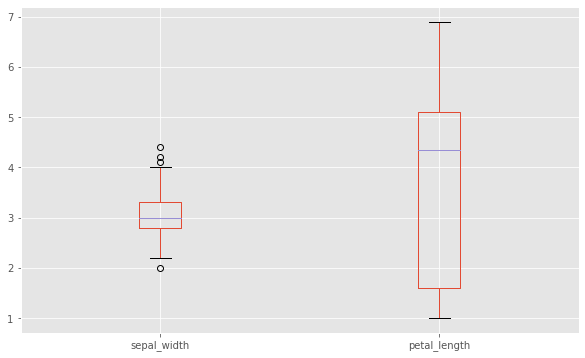

In [8]:
iris_df[['sepal_width','petal_length']].plot(kind='box', figsize = (10,6))

<AxesSubplot:>

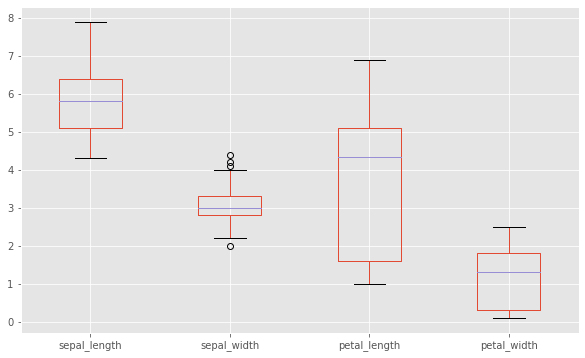

In [6]:
iris_df.plot(kind='box', figsize = (10,6))

------------

## .plot.bar()

<AxesSubplot:>

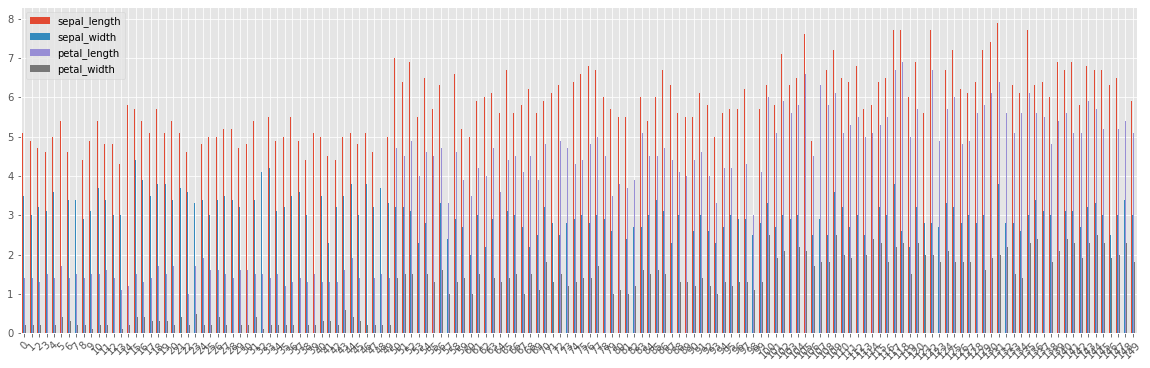

In [13]:
iris_df.plot(kind='bar', rot=45, figsize = (20,6))
# plt.title("sepal_length eda")
# plt.xlabel("Data")
# plt.ylabel("sepal_length")
# plt.show()

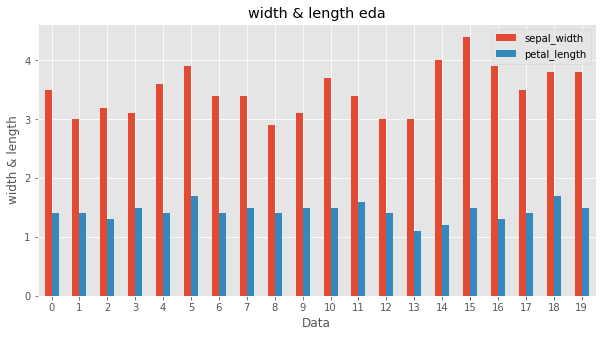

In [20]:
iris_df[["sepal_width","petal_length"]][:20].plot(kind='bar', rot=0, figsize=(10,5))
plt.title("width & length eda")
plt.xlabel("Data")
plt.ylabel("width & length")
plt.show()

In [32]:
iris_df = iris_df.reset_index().rename(columns = {'index':'ID'})
iris_df.ID = iris_df.ID+100
iris_df.head()

,ID,sepal_length,sepal_width,petal_length,petal_width,target
0,100,5.1,3.5,1.4,0.2,setosa
1,101,4.9,3.0,1.4,0.2,setosa
2,102,4.7,3.2,1.3,0.2,setosa
3,103,4.6,3.1,1.5,0.2,setosa
4,104,5.0,3.6,1.4,0.2,setosa


In [35]:
iris_df.columns

Index(['ID', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'target'],
      dtype='object')

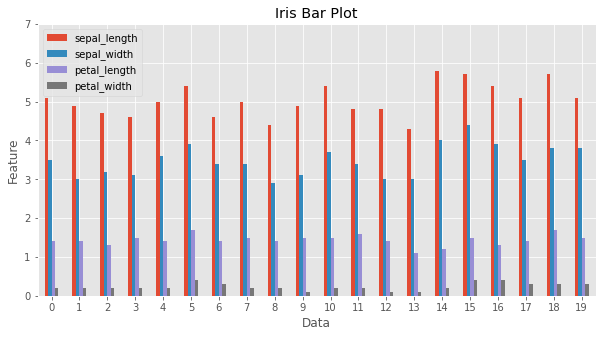

In [38]:
iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']][:20].plot.bar(rot=0, figsize=(10,5))
plt.title("Iris Bar Plot")
plt.xlabel("Data")
plt.ylabel("Feature")
plt.ylim(0, 7)
plt.show()

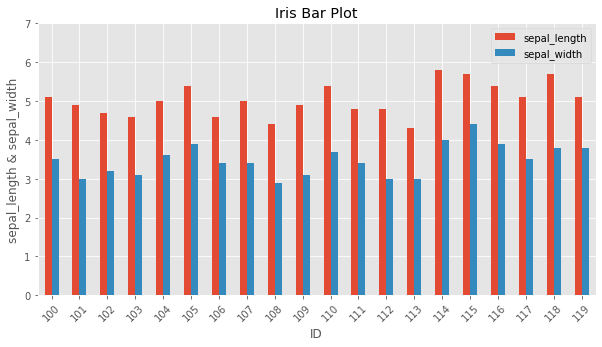

In [47]:
iris_df[:20].plot.bar(x = 'ID', y =['sepal_length','sepal_width'] ,rot=45, figsize=(10,5))
plt.title("Iris Bar Plot")
plt.xlabel("ID")
plt.ylabel("sepal_length & sepal_width")
plt.ylim(0, 7)
plt.show()

----

## 그룹화 이후 그리기

In [66]:
## ID는 제외
iris_df.loc[:,"sepal_length":].groupby('target').mean()
df1 = iris_df.loc[:,"sepal_length":].groupby('target').mean()
df1.head()

,sepal_length,sepal_width,petal_length,petal_width
target,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [71]:
df1.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [67]:
## ID는 제외
iris_df.loc[:,"sepal_length":].groupby('target').mean().T
df2 = iris_df.loc[:,"sepal_length":].groupby('target').mean().T
df2.head()

target,setosa,versicolor,virginica
sepal_length,5.006,5.936,6.588
sepal_width,3.428,2.770,2.974
petal_length,1.462,4.260,5.552
petal_width,0.246,1.326,2.026


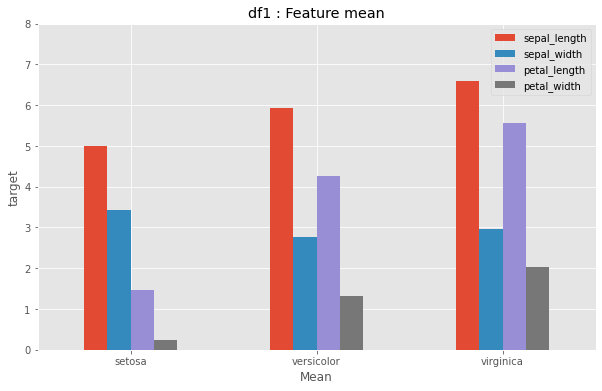

In [78]:
## 그룹분석 결과 시각화 : df1
df1.plot.bar(rot=0, figsize=(10,6))
plt.title("df1 : Feature mean")
plt.xlabel("Mean")
plt.ylabel("target")
plt.ylim(0, 8)
plt.show()

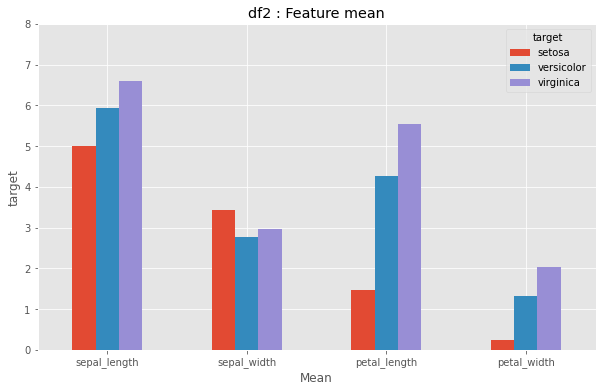

In [86]:
## 그룹분석 결과 시각화 : df2
df2.plot.bar(rot=0, figsize=(10,6))
plt.title("df2 : Feature mean")
plt.xlabel("Mean")
plt.ylabel("target")
plt.ylim(0, 8)
plt.show()

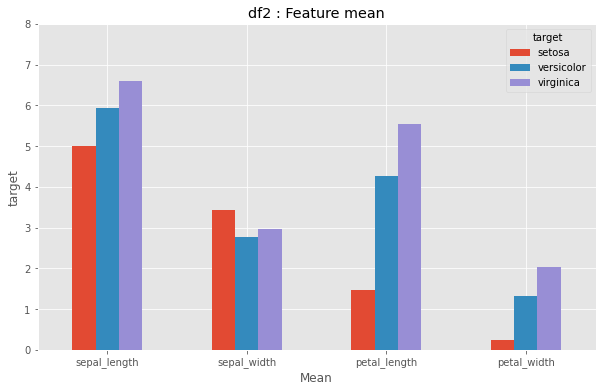

In [83]:
## 그룹분석 결과 시각화 : df2
df2.plot.bar(rot=0, figsize=(10,6))
plt.title("df2 : Feature mean")
plt.xlabel("Mean")
plt.ylabel("target")
plt.ylim(0, 8)
plt.show()

-------

## color 추가

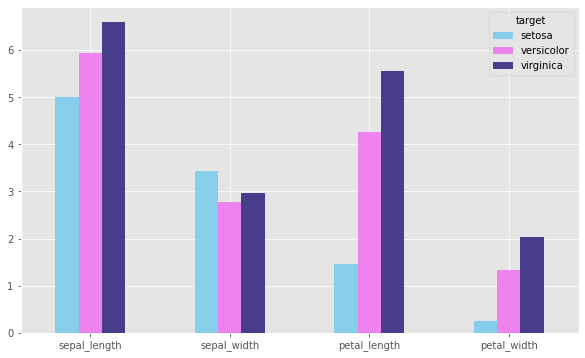

In [92]:
## 그룹분석 결과 시각화 : df2
df2.plot.bar(rot=0, figsize=(10,6), color=['skyblue','violet', 'darkslateblue'])
plt.show()

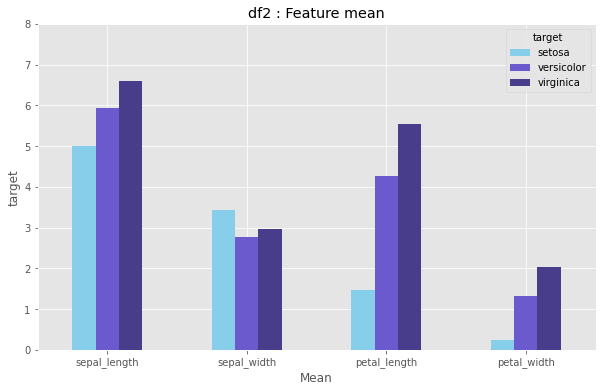

In [89]:
## 그룹분석 결과 시각화 : df2
df2.plot(kind = 'bar', rot=0, figsize=(10,6), color=['skyblue','slateblue', 'darkslateblue'])
plt.title("df2 : Feature mean")
plt.xlabel("Mean")
plt.ylabel("target")
plt.ylim(0, 8)
plt.show()

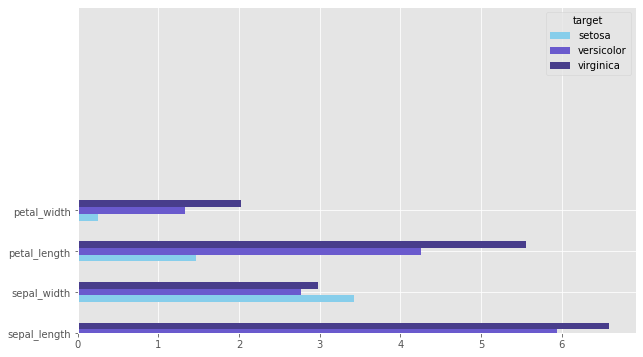

In [96]:
## df2 가로로 그리기
df2.plot(kind = 'barh', rot=0, figsize=(10,6), color=['skyblue','slateblue', 'darkslateblue'])
plt.ylim(0, 8)
plt.show()

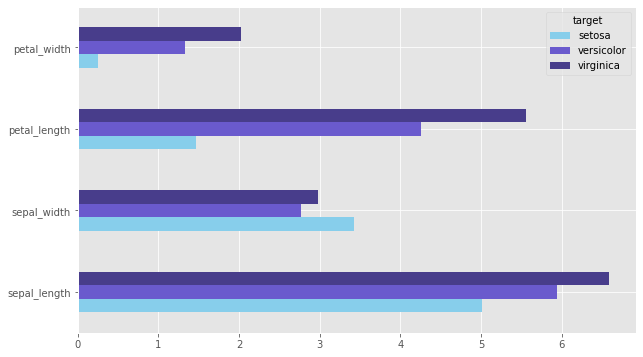

In [97]:
## df2 가로로 그리기
df2.plot(kind = 'barh', rot=0, figsize=(10,6), color=['skyblue','slateblue', 'darkslateblue'])
plt.show()